<h1>1. Import and setup library, Data structure</h1>

In [23]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from typing import List, Dict
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set_style('whitegrid')

In [24]:
class ACRULE:
    def __init__(self, X, Y):
        # for Rule: X -> Y
        self.antecedent = X                # X
        self.consequent = Y                 # Y
        self.antecedentSUP = 0.0            # SUP(X)
        self.antecedentNConsequentSUP = 0.0 # SUP(XY)
        self.confidence = 0.0               # SUP(XY)/SUP(X)
  
    def toString(self):
        return f"{self.antecedent} ===> {self.consequent} (supportX = {self.antecedentSUP}, supportXY = {self.antecedentNConsequentSUP}, confidence = {self.confidence})"

<h1>2. Exploring, Preprocessing Dataset</h1>
<h1>2.1 Data Loader, Data visualization and Analysis</h1>
<h1>2.1.1 Create Data loader & view</h1>

In [ ]:
import pandas as pd

class DataLoader:
    def __init__(self, data_path, className = 'class'):
        # Step 1: Load CSV
        self.dataset = pd.read_csv(data_path)
        self.transactions = None
        self.noClassTransactions = None
        self.class_items = None
        self.className = className
        self.allAttributes = list(self.dataset.columns)
        #self.class_index = self.allAttributes.index(self.className)
        self.classValues = self.dataset[self.className].unique()
        class_counts = self.dataset[self.className].value_counts().to_dict()
        self.appearOfEachClass = {}
        for key in class_counts:
            self.appearOfEachClass[f'{self.className}:{key}'] = class_counts[key]
        print(self.appearOfEachClass)
        

    def convert2Transactions(self):
        """Convert the numeric DataFrame rows into list-of-list transactions"""
        self.transactions = []
        for _, row in self.dataset.iterrows():
            T = []
            for col in self.allAttributes:
                T.append(f"{col}:{row[col]}")
            self.transactions.append(T)

    def getTransactionWithoutClass(self):
        self.noClassTransactions = []
        for _, row in self.dataset.iterrows():
            T = []
            for col in self.allAttributes:
                if col != self.className:
                    T.append(f"{col}:{row[col]}")
            self.noClassTransactions.append(T)

        
myData = DataLoader(className ='play', data_path = '/kaggle/working/weather_data.csv')#"/kaggle/input/mushroom-classification/mushrooms.csv")

myData.dataset.info()

{'play:yes': 13, 'play:no': 6}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   play     19 non-null     object
 1   outlook  19 non-null     object
 2   temp     19 non-null     object
 3   humid    19 non-null     object
 4   wind     19 non-null     object
 5   day      19 non-null     object
 6   moon     19 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [26]:
myData.dataset.head(10).style.set_table_styles(
    [{'selector': 'table', 'props': 'height:300px; overflow:auto; display:block;'}]
)

,play,outlook,temp,humid,wind,day,moon
0,no,sunny,hot,high,weak,tuesday,full
1,no,sunny,hot,high,strong,tuesday,small
2,yes,overcast,hot,high,weak,tuesday,full
3,yes,rainy,mild,high,strong,tuesday,small
4,yes,rainy,cool,normal,weak,monday,full
5,no,rainy,cool,normal,strong,monday,small
6,yes,overcast,cool,normal,strong,monday,full
7,no,sunny,mild,high,weak,monday,small
8,yes,sunny,cool,normal,weak,monday,full
9,yes,rainy,mild,normal,weak,monday,small


<h1>2.1.2 Data visualization and Analysis</h1>

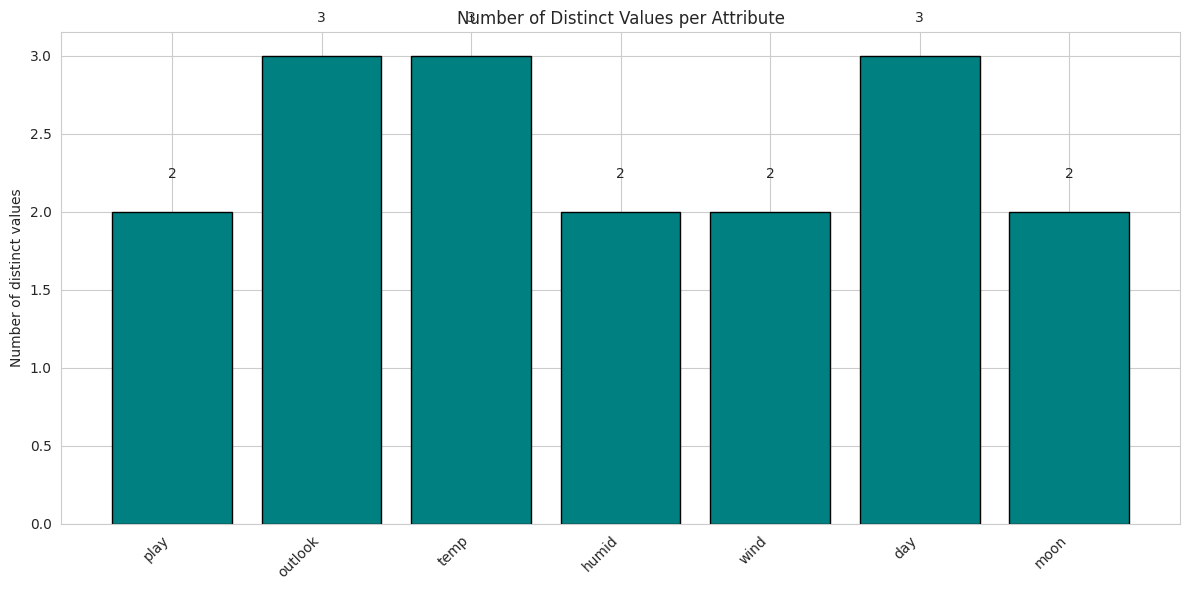

In [27]:
import matplotlib.pyplot as plt

# Count distinct values for each column
distinct_counts = myData.dataset.nunique()

# Plot bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(distinct_counts.index, distinct_counts.values, color="teal", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of distinct values")
plt.title("Number of Distinct Values per Attribute")

# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


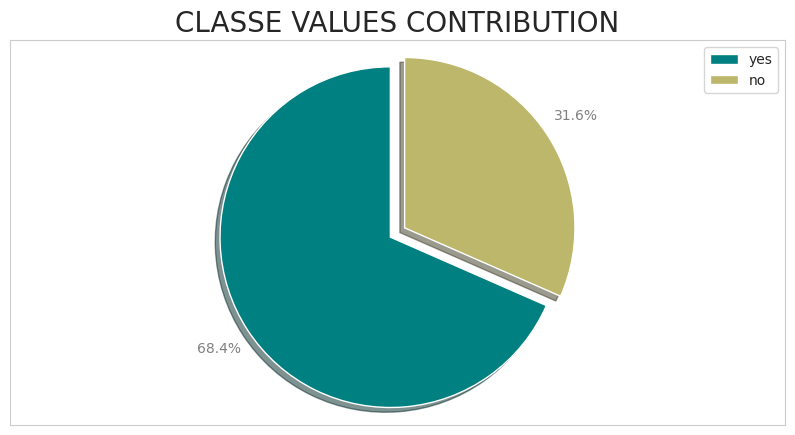

In [28]:
labels = myData.dataset[myData.className].value_counts().index #diagnosed_diabetes
sizes = myData.dataset[myData.className].value_counts().values

plt.figure(figsize=(10,5))
plt.pie(x=sizes,autopct='%1.1f%%',explode=(0.1,0),shadow=True, textprops={'color':"gray"}, 
startangle=90,colors=["teal","darkkhaki"],frame=True,pctdistance=1.2,labeldistance=0)
plt.axis('equal')
plt.legend(labels)
plt.title("Classe values contribution".upper(),fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

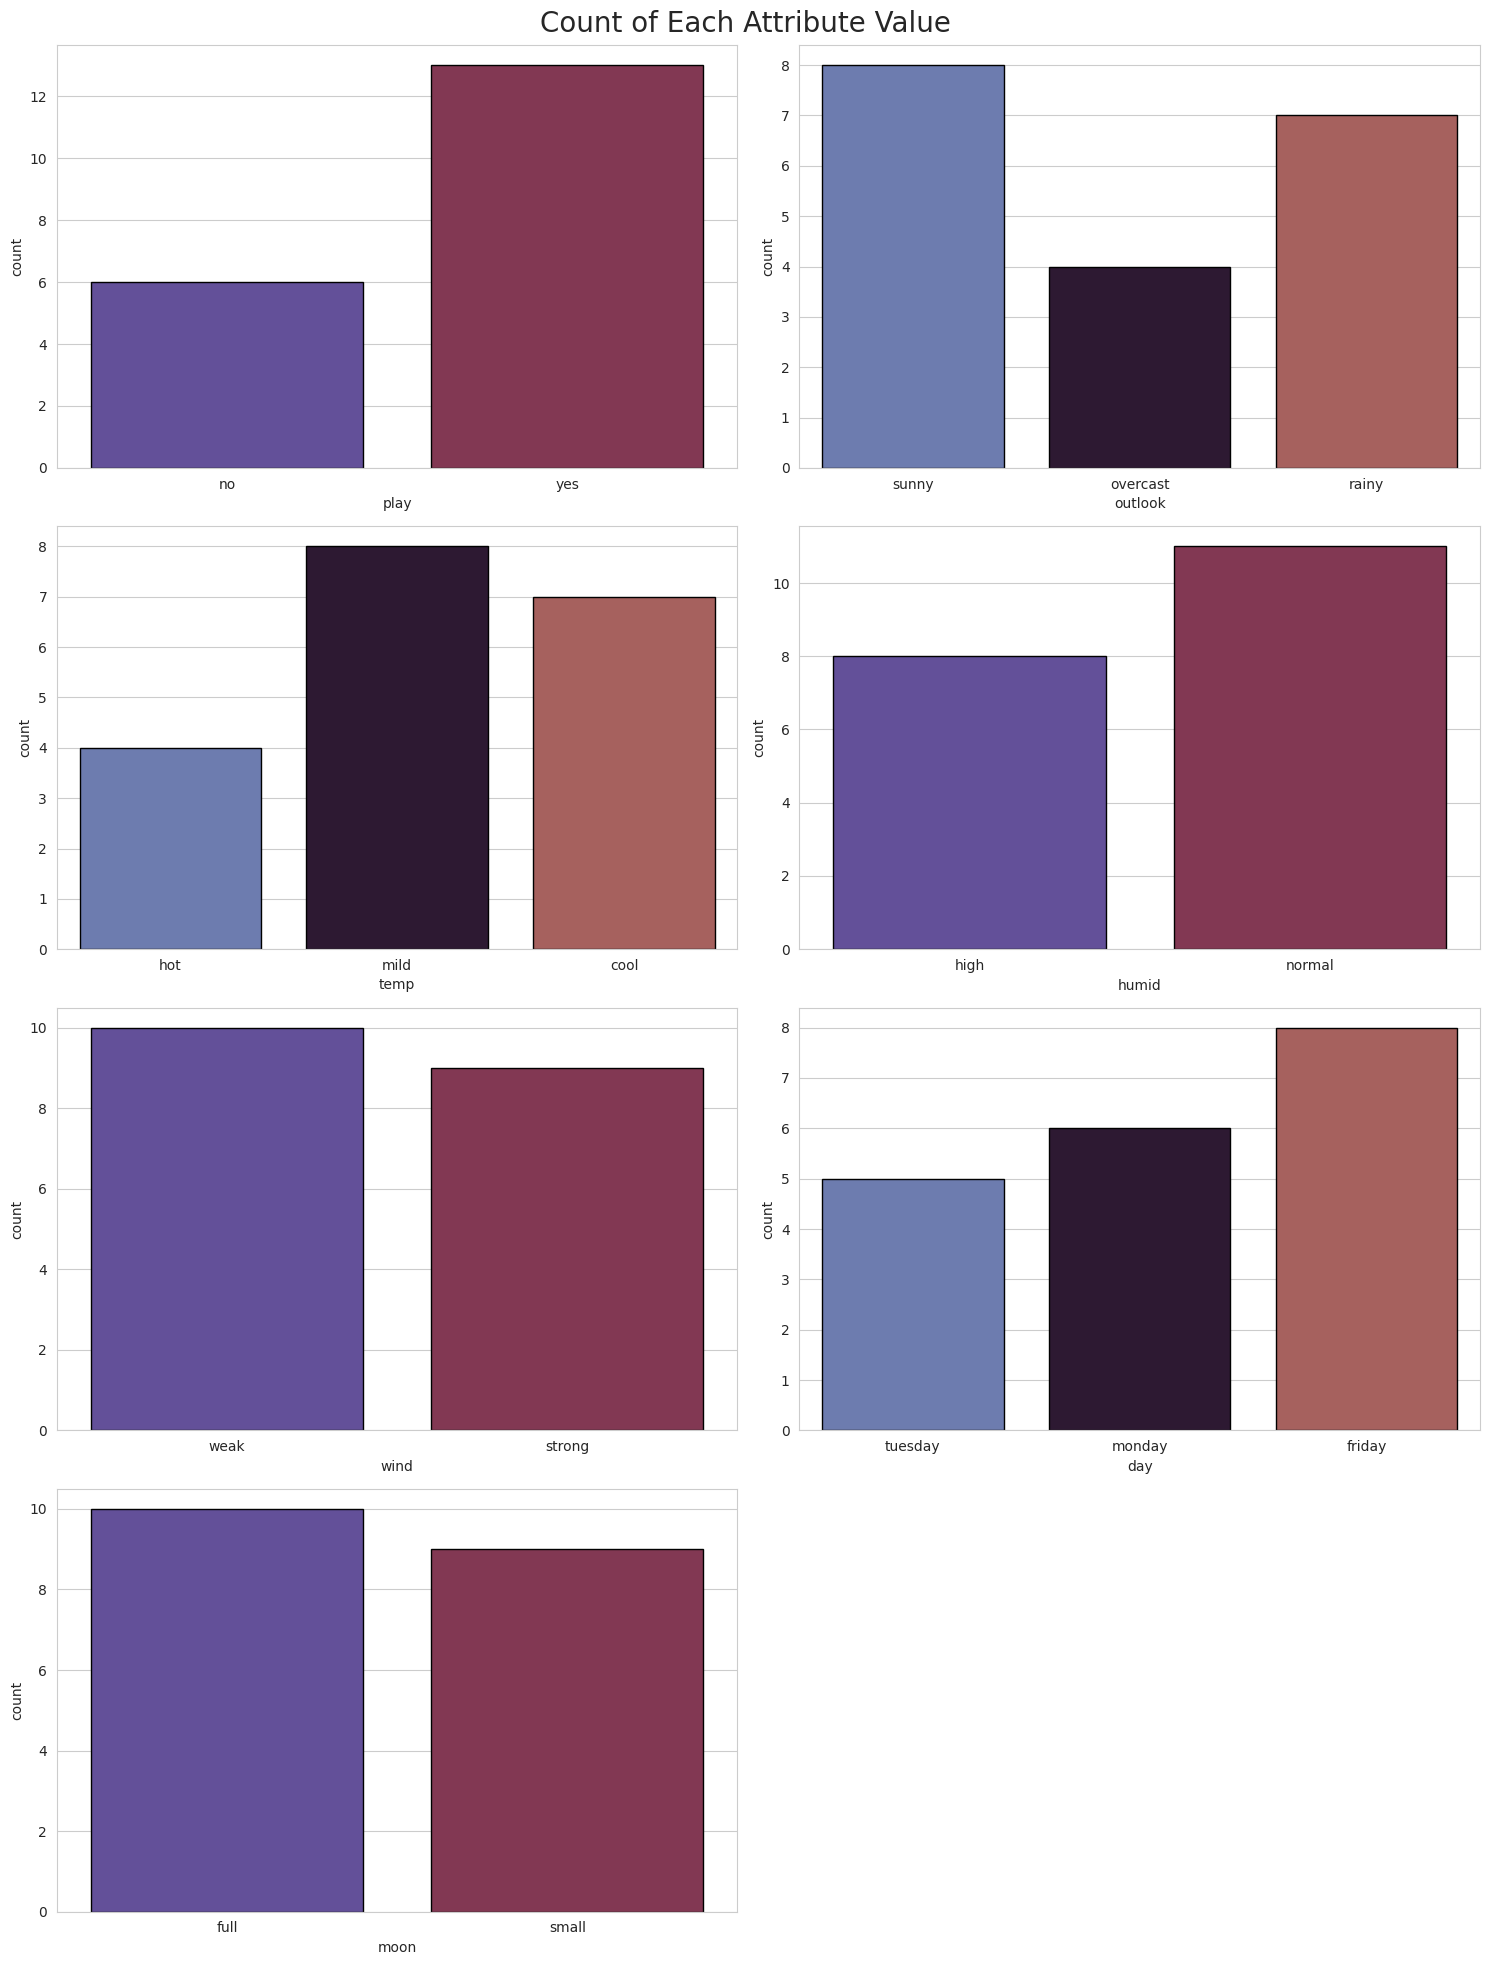

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))

num_cols = myData.dataset.shape[1]   # exclude class column
for idx, col in enumerate(myData.dataset.iloc[:, :].columns):
    plt.subplot((num_cols + 1) // 2, 2, idx + 1)  # subplot index starts at 1
    sns.countplot(x=col, data=myData.dataset, palette="twilight", edgecolor="black")
    plt.xlabel(col)
    plt.ylabel("count")

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for suptitle
plt.suptitle("Count of Each Attribute Value", fontsize=20)
plt.show()


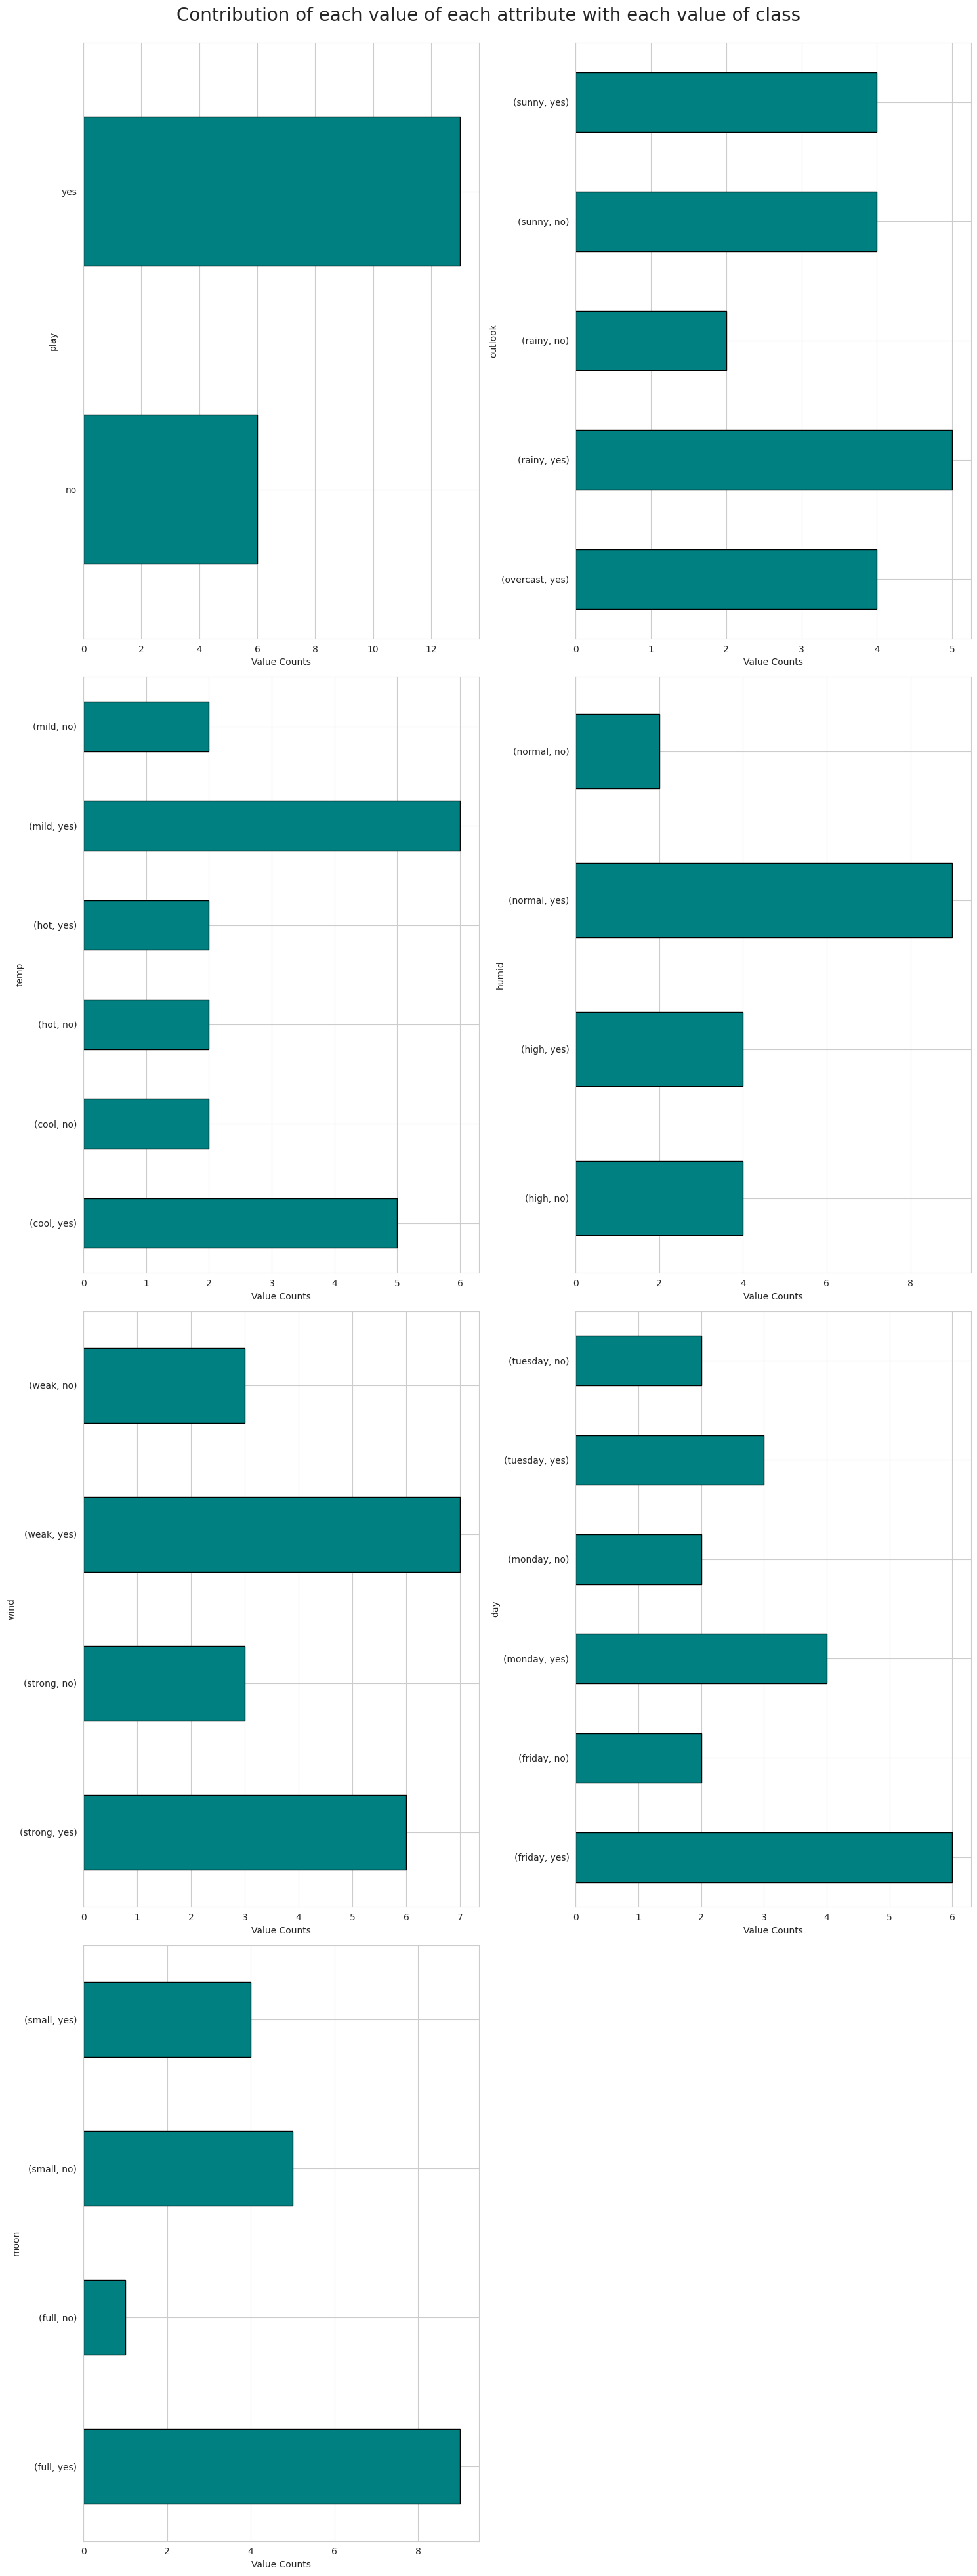

In [30]:
num_cols = myData.dataset.shape[1] 
num_rows = (num_cols + 1) // 2 

plt.figure(figsize=(15, 40))

for idx, col in enumerate(myData.dataset.iloc[:, :].columns):
    plt.subplot(num_rows, 2, idx + 1)  # subplot index starts at 1
    myData.dataset.groupby(col)[myData.className].value_counts().plot(
        kind="barh", edgecolor="black", color="teal"
    )
    plt.xlabel("Value Counts")
    plt.ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Contribution of each value of each attribute with each value of class", fontsize=20)
plt.show()


<h1>2.2 Convert Data Table to transaction</h1>

In [31]:
myData.convert2Transactions()
for i in range(5):
    print(myData.transactions[i])

['play:no', 'outlook:sunny', 'temp:hot', 'humid:high', 'wind:weak', 'day:tuesday', 'moon:full']
['play:no', 'outlook:sunny', 'temp:hot', 'humid:high', 'wind:strong', 'day:tuesday', 'moon:small']
['play:yes', 'outlook:overcast', 'temp:hot', 'humid:high', 'wind:weak', 'day:tuesday', 'moon:full']
['play:yes', 'outlook:rainy', 'temp:mild', 'humid:high', 'wind:strong', 'day:tuesday', 'moon:small']
['play:yes', 'outlook:rainy', 'temp:cool', 'humid:normal', 'wind:weak', 'day:monday', 'moon:full']


<h1>3.Model</h1>
<h1>3.1 Rule Extraction(Associative Rules)</h1>

In [32]:
def notPruneIf_has_all_k_subsets_in_Lk(c: List[str], Lk: Dict[tuple, int]) -> bool:
    """Check Apriori property: all k-subsets are frequent"""
    for idx in range(len(c)):
        subset = tuple(sorted(c[:idx] + c[idx+1:]))
        if subset not in Lk:
            return False
    return True

class ARClassification:
    def __init__(self, transactions, className, classValues, minsup=0.1, minconf=0.8):
        self.T = transactions
        self.minsup = minsup
        self.min_cnt = int(math.ceil(minsup * len(transactions)))
        self.minconf = minconf
        self.className = className
        self.classValues = classValues
        self.allRules = []

    def ConsideringRules(self, allCandidateRules):
        """Count support and confidence, separate Fk and qualified rules"""
        for rule in allCandidateRules:
            rule.antecedentSUP = 0
            rule.antecedentNConsequentSUP = 0
            for t in self.T:
                if all(item in t for item in rule.antecedent):
                    rule.antecedentSUP += 1
                if all(item in t for item in rule.antecedent + rule.consequent):
                    rule.antecedentNConsequentSUP += 1

            rule.confidence = rule.antecedentNConsequentSUP / (rule.antecedentSUP + 1e-20)
           
        Fk = []
        for rule in allCandidateRules:
            if rule.antecedentSUP >= self.min_cnt and rule.confidence >= self.minconf:
                self.allRules.append(rule)
            elif rule.antecedentSUP >= self.min_cnt:
                rule.antecedent.sort()
                Fk.append(rule)

        return Fk

    def FindF1Rules(self):
        allF1Itemsets = set()
        allCandidateRules = []

        # Collect 1-item antecedents (excluding class column)
        for t in self.T:
            for it in t:
                if not any(it == f'{self.className}:{v}' for v in self.classValues):
                    allF1Itemsets.add(it)

        # Generate 1-rule candidates
        for item in allF1Itemsets:
            for value in self.classValues:
                rule = ACRULE(X=[item], Y=[f'{self.className}:{value}'])
                allCandidateRules.append(rule)

        return self.ConsideringRules(allCandidateRules)

    def FindFkRules(self, FKRules, k):
        """Generate k-item rules from (k-1)-item rules"""
        Lk: Dict[tuple, int] = {}
        for rule in FKRules:
            Lk[tuple(sorted(rule.antecedent))] = rule.antecedentSUP

        ruleKPlus1 = []
        candidateSet = set()

        for rule1 in FKRules:
            for rule2 in FKRules:
                if rule1.consequent == rule2.consequent:
                    newItemset = list(set(rule1.antecedent + rule2.antecedent))
                    if len(newItemset) != k + 1:  # k+1-item candidates
                        continue
                    key = tuple(sorted(newItemset))
                    if key in candidateSet:
                        continue
                    candidateSet.add(key)
                    if notPruneIf_has_all_k_subsets_in_Lk(newItemset, Lk):
                        newRule = ACRULE(X=newItemset, Y=rule2.consequent)
                        ruleKPlus1.append(newRule)

        ruleKPlus1 = self.ConsideringRules(ruleKPlus1)
        # Only return rules with exactly k+1 antecedents
        return [r for r in ruleKPlus1 if len(r.antecedent) == k + 1]

    def RuleGeneration(self):
        Lk = self.FindF1Rules()
        k = 1
        while Lk:
            Lk = self.FindFkRules(Lk, k)
            k += 1
        for r in self.allRules:
            print(r.toString())

# Example usage:
myModel = ARClassification(myData.transactions, className=myData.className,
                          classValues=myData.classValues, minsup=0.1, minconf=0.8)
myModel.RuleGeneration()


['humid:normal'] ===> ['play:yes'] (supportX = 11, supportXY = 9, confidence = 0.8181818181818182)
['moon:full'] ===> ['play:yes'] (supportX = 10, supportXY = 9, confidence = 0.9)
['outlook:overcast'] ===> ['play:yes'] (supportX = 4, supportXY = 4, confidence = 1.0)
['outlook:sunny', 'temp:hot'] ===> ['play:no'] (supportX = 2, supportXY = 2, confidence = 1.0)
['outlook:sunny', 'moon:small'] ===> ['play:no'] (supportX = 3, supportXY = 3, confidence = 1.0)
['outlook:sunny', 'humid:high'] ===> ['play:no'] (supportX = 4, supportXY = 4, confidence = 1.0)
['temp:cool', 'moon:small'] ===> ['play:no'] (supportX = 2, supportXY = 2, confidence = 1.0)
['moon:small', 'wind:strong', 'humid:normal'] ===> ['play:no'] (supportX = 2, supportXY = 2, confidence = 1.0)
['outlook:rainy', 'wind:strong', 'humid:normal'] ===> ['play:no'] (supportX = 2, supportXY = 2, confidence = 1.0)
['outlook:sunny', 'temp:mild', 'wind:weak'] ===> ['play:no'] (supportX = 2, supportXY = 2, confidence = 1.0)
['humid:high', 't

<h1 style="text-align:center">==========END!==========</h1>